

#***Przetwarzanie danych drincs.csv***

###***Import danych oraz wypianie wczytanej tabeli dataframe***

W celu uruchomienia dalszej funkcjonalności konieczne jest wybranie pliku z danymi do przetworzenia. Plik ten musi mieć nazwę driks.csv i znajduje się w folderze Original Data.

In [69]:
# zmienna download na True powoduje pobieranie spreparowanych danych
download = False

In [70]:
import pandas as pd
import io
import matplotlib.pyplot as plt
from google.colab import files
import numpy as np

# wczytanie pliku z danymi
uploaded = files.upload()
df = pd.read_csv(io.BytesIO(uploaded['drinks.csv']))

Saving drinks.csv to drinks (4).csv


In [71]:
# wypisanie danych
df.head(len(df.index))

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Afghanistan,0,0,0,0.0
1,Albania,89,132,54,4.9
2,Algeria,25,0,14,0.7
3,Andorra,245,138,312,12.4
4,Angola,217,57,45,5.9
...,...,...,...,...,...
188,Venezuela,333,100,3,7.7
189,Vietnam,111,2,1,2.0
190,Yemen,6,0,0,0.1
191,Zambia,32,19,4,2.5


##Podstawowa analiza

Poniższa tabela przedstawia podstawowe parametry określające zbiór danych takie jak: 
*   średnia wartość  
*   wartość maksymalna 
*   wartość minimalna 
*   odchylenie standardowe







In [72]:
# wyliczenie podstawowych parametrów opisujących dataframe
desc = df.describe()

# wyodrębnienie tylko interesujących wierszy
desc = desc.loc[["mean", "max", "min", "std"]]

if download:
  desc.to_csv('Description.csv', index=False)
  files.download('Description.csv')

desc

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
mean,106.160622,80.994819,49.450777,4.717098
max,376.000000,438.000000,370.000000,14.400000
min,0.000000,0.000000,0.000000,0.000000
std,101.143103,88.284312,79.697598,3.773298


##Wykres zawierający dane z kolumn beer, spirit i wine servings.

Wykres za pomocą różnych kolorów przestawia ile danego rodzaju alkoholu wypito w jakim kraju. 

Parametrów na osi x jest bardzo dużo stąd trudno odczytać konkretne wartości dla daneo kraju.

Utworzony wykres pozwala jednak wysnuć liczne wnioski, jak na przykład:
* ilość spożywanego średnio wina jest mniejsza niż innych alkoholi (świadczy o tym duże zagęszczenie czerwonych punktów na dole wykresu)
* niektóre państwa nie spożywają prawie wcale alkoholu (widoczne nałożenie na siebie trzech kropek pionowo blisko zera)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

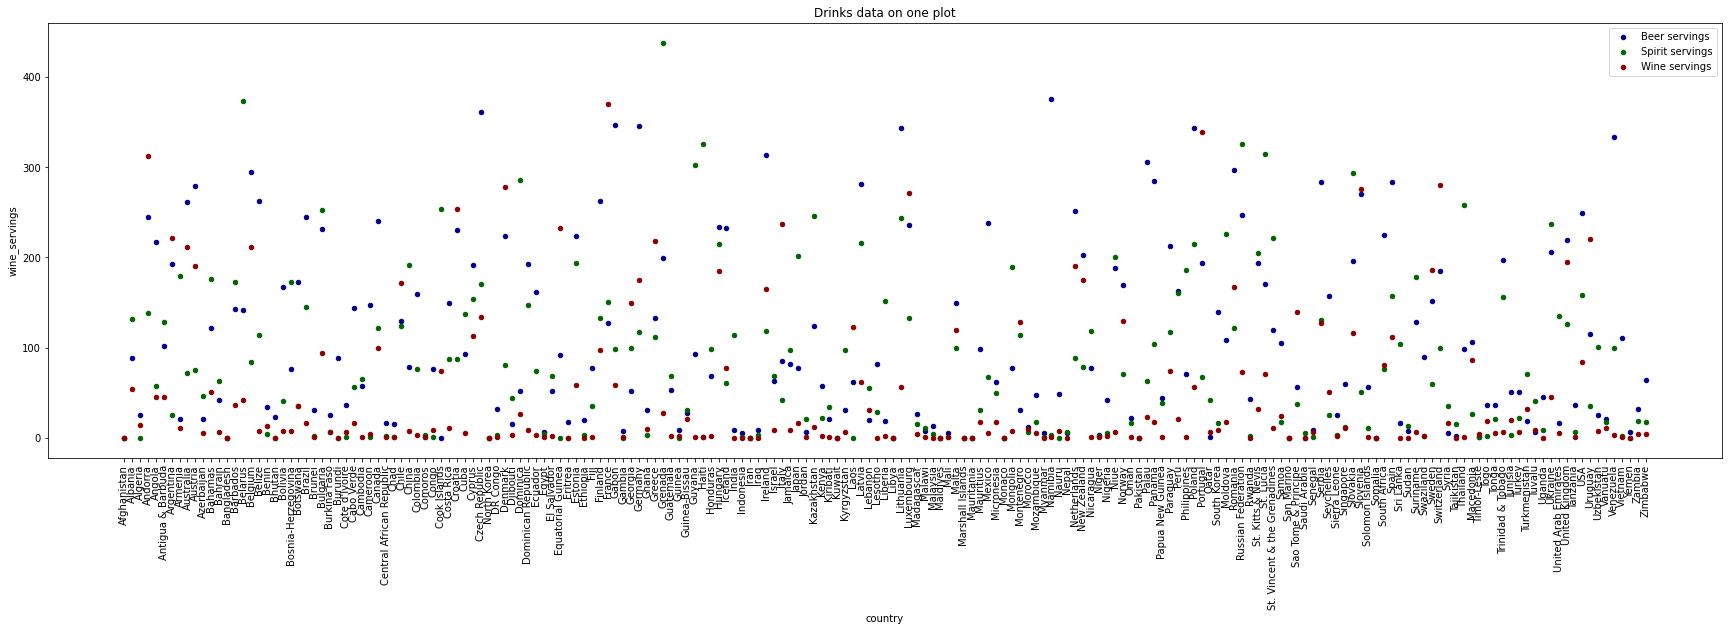

In [73]:
# plot
figsize = (30,8)
title = "Drinks data on one plot"

ax1= df.plot(x="country", y="beer_servings", figsize=figsize, title=title, sharex=False, ylabel="number of servings", kind="scatter", rot=90, color="DarkBlue", label="Beer servings")
ax2 = df.plot(x="country", y="spirit_servings", kind="scatter", rot=90, ax=ax1, color="DarkGreen", label="Spirit servings")
ax3 = df.plot(x="country", y="wine_servings", kind="scatter", rot=90, ax=ax2, color="DarkRed", label="Wine servings")

if download:
  plt.savefig('AllDrinksDataPlot.png')
  files.download('AllDrinksDataPlot.png')

##Przetworzenie danych z kolumny total_litres_of_pure_alcohol

Dane wypisano na wykresie w postaci punktów. Czerwona linia obrazuje średnie spożycie alkoholu na przestrzeni krajów.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

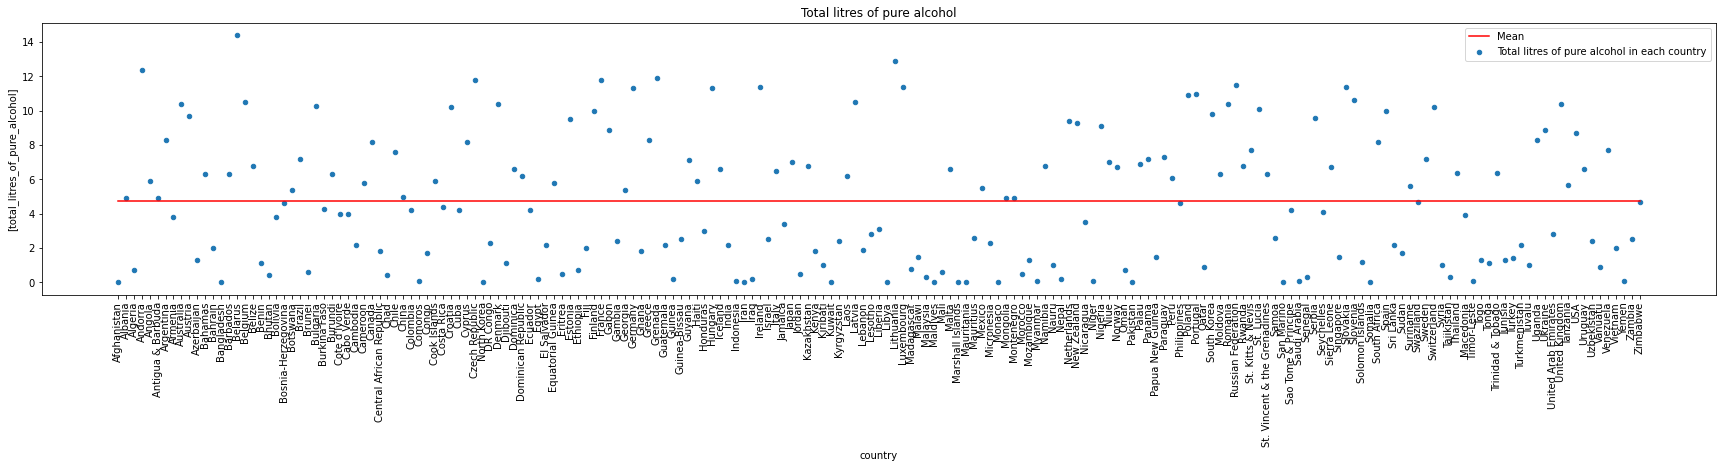

In [74]:
# plot wartości kolumny total_litres_of_pure_alcohol
figsize = (30,5)
title = "Total litres of pure alcohol"
df.plot(x="country", y=["total_litres_of_pure_alcohol"], figsize=figsize, title=title, sharex=False, ylabel="litres", kind="scatter", rot=90)

# zbiór wartości kolumny country
countries = df.country.values

# wyliczenie średniej z kolumny total_litres_of_pure_alcohol
mean = df["total_litres_of_pure_alcohol"].mean()

# dołożenie do wykresu średniej
plt.plot(countries, [mean for i in range(193)], color="red")
plt.legend(["Mean", "Total litres of pure alcohol in each country"])

if download:
  plt.savefig('TotalLitresPureAlcoholPlot.png')
  files.download('TotalLitresPureAlcoholPlot.png')

plt.show()

##Posortowane rosnąco dane total_litres_of_pure_alcohol


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

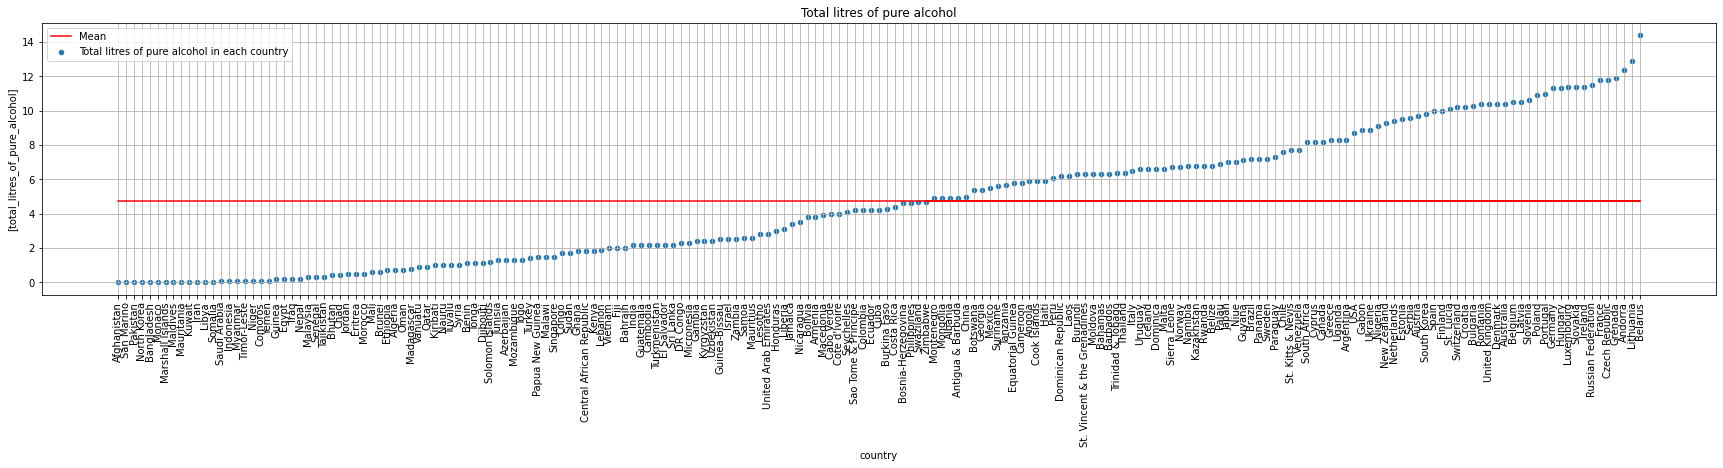

In [75]:
# wykestraktowano kolumny country i total_litres_of_pure_alcohol z główego dataframe
pure = df[['country', 'total_litres_of_pure_alcohol']]

# posortowanie warości rosnąco
pure = pure.sort_values('total_litres_of_pure_alcohol')

# reset indeksów pozwala utworzyć wykres przy zmienionej indeksacjji po przesortowaniu 
pure = pure.reset_index() 

# plot
pure.plot(x="country", y=["total_litres_of_pure_alcohol"], figsize=figsize, title=title, sharex=False, ylabel="litres", kind="scatter", rot=90)

# dołożenie do wykresu średniej
plt.plot(countries, [mean for i in range(193)], color="red")
plt.legend(["Mean", "Total litres of pure alcohol in each country"])
plt.grid(True)

if download:
  plt.savefig('TotalLitresPureAlcoholSortedPlot.png')
  files.download('TotalLitresPureAlcoholSortedPlot.png')

##***20*** krajów spożywających najwięcej i najmniej alkoholu rocznie wraz z konkretną wartością ilości wypijanych średnio litrów na osobę

In [76]:
# wypisanie 20 pierwszych wierszy dataframe z total_litres_of_pure_alcohol
head = pure.head(20)

if download:
  head.to_csv('HeadTotalLitresPureAlcoholSorted.csv', index=False)
  files.download('HeadTotalLitresPureAlcoholSorted.csv')

head

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,index,country,total_litres_of_pure_alcohol
0,0,Afghanistan,0.0
1,147,San Marino,0.0
2,128,Pakistan,0.0
3,46,North Korea,0.0
4,13,Bangladesh,0.0
5,111,Monaco,0.0
6,106,Marshall Islands,0.0
7,103,Maldives,0.0
8,107,Mauritania,0.0
9,90,Kuwait,0.0


In [77]:
# wypisanie 20 ostatnich wierszy dataframe z total_litres_of_pure_alcohol
tail = pure.tail(20)

if download:
  tail.to_csv('TailTotalLitresPureAlcoholSorted.csv', index=False)
  files.download('TailTotalLitresPureAlcoholSorted.csv')

tail

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,index,country,total_litres_of_pure_alcohol
173,182,United Kingdom,10.4
174,48,Denmark,10.4
175,8,Australia,10.4
176,16,Belgium,10.5
177,93,Latvia,10.5
178,156,Slovenia,10.6
179,135,Poland,10.9
180,136,Portugal,11.0
181,65,Germany,11.3
182,75,Hungary,11.3
